In [1]:
########################################
#
# Python入門（データの読み込み&分析編）
#
#　　　　　    by Y.Maeda　　   　     
#　　　created :       2021/05/28 　  
#     last modified : 2022/05/04 　  
#
########################################

#更新履歴
#2021/06/08：コーポレートガバナンスデータの処理を追加（注：正規表現を使用していますので import re が 追加で必要になります．）
#2021/06/08：ZaimuTextile.csv（繊維産業の財務データ（日経NEEDS））のデータを更新しました．古いファイルは，項目の一部しか入っていませんでした．
#2021/06/09：'固定比率の逆数'を'固定比率'の逆数で定義して使用していましたが，非線形変換になり， 分析結果がおかしくなったので使用しないことにしました．（'固定比率'を使用します．）
#2021/06/10：「CAPMの計算」を追加しました．（注：回帰分析に statsmodels を使用しています．）

In [2]:
%pwd

'C:\\Users\\shintaro\\Downloads'

In [3]:
#以下のパッケージが必要です．ない場合はpipを用いてインストールしてください．


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import re

import statsmodels.api as sm

idx = pd.IndexSlice

#from sklearn import linear_model
#import datetime

#株価データ読み込み用の関数です．

def data_get(fileName,indexName):
    data = pd.read_csv(fileName, encoding="shift-jis")
    data[indexName] = pd.to_datetime(data[indexName])
    data = data.set_index(indexName)
    return(data)

#財務データ読み込み用の関数です．

def data_get_Zaimu(fileName,indexName,indexName2):
    data = pd.read_csv(fileName, encoding="shift-jis")
    #（'決算期'(str)列を'決算期'(datetime)に変換）
    data[indexName] = pd.to_datetime(data[indexName])
    # '年'を作成
    data['年'] = data[indexName].dt.year
    # 階層インデックスの作成---> dfZData2
    data2 = data.set_index([indexName2,'年'], drop=True)
    return(data2)



In [4]:
pip install japanize_matplotlib

In [5]:
cd /Users/shintaro/Downloads

C:\Users\shintaro\Downloads


In [6]:
#上述の関数を用いてデータを読み込みます．（データとプログラムを同じフォルダーに入れる）

##############################################################
#　　 　　日経平均の日次データの読み込み（日経NEEDSより）　　　　 　
##############################################################
stockD = data_get('StockD_Textile.csv','日付')
stockM = stockD.resample('M').mean()

####################################################################
#　　　　　国債金利の日次データの読み込み（財務省ホームページより）　　　　　　　
####################################################################
bondD = data_get('Datajgbcm_all.csv','基準日')
bondM = bondD.resample('M').mean()/100

####################################################################
#　　　　　財務データの読み込み（日経NEEDSより）　　　　　　　
####################################################################
zTexData2 = data_get_Zaimu("TextileZaimu.csv",'決算期','企業名称')


In [7]:
stockM

日経平均        TOPIX       東証2部総合       東証マザーズ      JASDAQ  \
日付                                                                            
1985-01-31  11814.977273   927.199545  1865.784545          NaN         NaN   
1985-02-28  12078.746364   941.178636  1882.040000          NaN         NaN   
1985-03-31  12472.932083   994.512083  1883.532917          NaN         NaN   
1985-04-30  12432.353750   972.462500  1803.451250          NaN         NaN   
1985-05-31  12565.230833   983.875000  1801.342083          NaN         NaN   
...                  ...          ...          ...          ...         ...   
2020-09-30  23306.946000  1632.806500  6354.017000  1167.945000  168.784500   
2020-10-31  23451.442727  1629.027727  6285.902727  1277.907727  172.461818   
2020-11-30  25384.867895  1714.501579  6324.483684  1214.507895  173.932632   
2020-12-31  26772.954545  1780.723636  6621.686364  1185.475455  179.559545   
2021-01-31  28189.063684  1842.176316  6832.845789  1240.316316  183.164211   

                   片倉工業          グンゼ           神栄        神戸生糸    川島織物セルコン  \
日付                                                                          
1985-01-31   578.333333  3964.636364  3209.545455  301.318182  307.533333   
1985-02-28   545.888889  4131.090909  3129.523810  325.272727         NaN   
1985-03-31   548.800000  4144.291667  3126.521739  343.083333  282.000000   
1985-04-30   549.461538  4336.125000  3286.666667  427.708333  290.800000   
1985-05-31   559.764706  4473.041667  3311.666667  429.875000  272.200000   
...                 ...          ...          ...         ...         ...   
2020-09-30  1228.800000  4002.250000   563.850000         NaN         NaN   
2020-10-31  1191.476190  3939.285714   632.857143         NaN         NaN   
2020-11-30  1283.368421  3748.421053   656.684211         NaN         NaN   
2020-12-31  1393.454545  3487.500000   794.363636         NaN         NaN   
2021-01-31  1346.052632  3349.736842  1714.315789         NaN         NaN   

            ...  コーコス信岡        フジックス  チャコット         川本産業  サンエー・インターナショナル資  \
日付          ...                                                             
1985-01-31  ...     NaN          NaN    NaN          NaN              NaN   
1985-02-28  ...     NaN          NaN    NaN          NaN              NaN   
1985-03-31  ...     NaN          NaN    NaN          NaN              NaN   
1985-04-30  ...     NaN          NaN    NaN          NaN              NaN   
1985-05-31  ...     NaN          NaN    NaN          NaN              NaN   
...         ...     ...          ...    ...          ...              ...   
2020-09-30  ...     NaN  1601.736842    NaN  1140.200000              NaN   
2020-10-31  ...     NaN  1654.000000    NaN  1228.571429              NaN   
2020-11-30  ...     NaN  1658.421053    NaN  1749.947368              NaN   
2020-12-31  ...     NaN  1607.150000    NaN  1888.227273              NaN   
2021-01-31  ...     NaN  1624.111111    NaN  1855.000000              NaN   

            クラウディアホールディングス  ＴＳＩホールディングス  はかた匠工芸  マツオカコーポレーション         ワールド  
日付                                                                          
1985-01-31             NaN          NaN     NaN           NaN          NaN  
1985-02-28             NaN          NaN     NaN           NaN          NaN  
1985-03-31             NaN          NaN     NaN           NaN          NaN  
1985-04-30             NaN          NaN     NaN           NaN          NaN  
1985-05-31             NaN          NaN     NaN           NaN          NaN  
...                    ...          ...     ...           ...          ...  
2020-09-30      309.600000   322.350000     NaN   2149.000000  1463.350000  
2020-10-31      299.523810   276.857143     NaN   2218.428571  1368.857143  
2020-11-30      301.947368   229.157895     NaN   2563.315789  1352.000000  
2020-12-31      280.272727   210.681818     NaN   2322.500000  1281.454545  
2021-01-31      267.105263   238.263158     NaN   2039.473684  1

In [8]:
#株価データには欠損値があります．欠損値の処理を行います．

################################
# 欠損値の処理 #
################################
# (上場廃止銘柄の削除）
nameList = []
for column_name, item in stockM.iteritems():
    if np.isnan(item.tail(1).iloc[0]):
      nameList.append(column_name)

print('=====上場廃止銘柄=====')
print(nameList) 
stockM2 = stockM.drop(nameList, axis=1)

# （欠損値を線形補完）
for column_name, item in stockM2.iteritems():
    if item.isnull().sum()>0:
      item.interpolate(method='linear',axis=0,limit=None,inplace=True,
              limit_direction='forward',limit_area='inside')
print('=====置換後=====')
for column_name, item in stockM2.iteritems():
    if item.isnull().sum()>0:
      print('(',column_name,')','欠損値の数：',item.isnull().sum())


=====上場廃止銘柄=====
['神戸生糸', '川島織物セルコン', '海岸ベルマネジメント', 'プロジェ・ホールディングス', '興和紡績', '第一紡績', 'トーア紡', 'ニッケテキスタイル', 'カネヨウ', '尾西毛糸紡績', '太陽毛糸紡績', '御幸毛織', 'トスコ', '東京麻糸紡績', '三菱ケミカル', 'オートリ', 'オリックス・インテリア', '東レ・アムテックス', '日本バイリーン', '堀田産業', 'ダイオ化成', 'ＮＢＣメッシュテック', '東洋クロス', 'オリカキャピタル', '大同マルタ染工', '高瀬染工場', 'カンボウプラス', '岐セン', '福助', '丸山工業', 'ＣＨＯＹＡ', '森下興産', 'コーコス信岡', 'チャコット', 'サンエー・インターナショナル資', 'はかた匠工芸']
=====置換後=====
( 東証マザーズ ) 欠損値の数： 224
( JASDAQ ) 欠損値の数： 95
( トーア紡コーポレーション ) 欠損値の数： 221
( 丸八ホールディングス ) 欠損値の数： 375
( フジコー ) 欠損値の数： 129
( ホギメディカル ) 欠損値の数： 83
( 自重堂 ) 欠損値の数： 109
( 山喜 ) 欠損値の数： 111
( フジックス ) 欠損値の数： 116
( 川本産業 ) 欠損値の数： 203
( クラウディアホールディングス ) 欠損値の数： 232
( ＴＳＩホールディングス ) 欠損値の数： 317
( マツオカコーポレーション ) 欠損値の数： 395
( ワールド ) 欠損値の数： 404


In [9]:
#株価のデータから収益率の計算を行います．

################################
# 　収益率の計算 　　　　　　　　　　
################################

#（日経平均の月次収益率（年率変換））
stockM_R = stockM2.pct_change()*12
# （最初の行のNaNを削除）
stockM_R = stockM_R.drop(stockM_R.index[[0]])

print(stockM_R)

                日経平均     TOPIX    東証2部総合    東証マザーズ    JASDAQ      片倉工業  \
日付                                                                       
1985-02-28  0.267900  0.180920  0.104549       NaN       NaN -0.673199   
1985-03-31  0.391616  0.680000  0.009519       NaN       NaN  0.063993   
1985-04-30 -0.039040 -0.266055 -0.510201       NaN       NaN  0.014465   
1985-05-31  0.128256  0.140828 -0.014034       NaN       NaN  0.225017   
1985-06-30  0.164698  0.329081 -0.304512       NaN       NaN  1.380434   
...              ...       ...       ...       ...       ...       ...   
2020-09-30  0.212476  0.283787 -0.282881  1.046646  0.235563  0.721594   
2020-10-31  0.074397 -0.027771 -0.128639  1.129807  0.261445 -0.364490   
2020-11-30  0.989325  0.629631  0.073652 -0.595347  0.102340  0.925496   
2020-12-31  0.656180  0.463496  0.563909 -0.286856  0.388213  1.029349   
2021-01-31  0.634719  0.414119  0.382669  0.555128  0.240900 -0.408211   

                 グンゼ         神栄      

In [10]:
#　企業名のプリント

print(list(stockM_R.columns.values))


['日経平均', 'TOPIX', '東証2部総合', '東証マザーズ', 'JASDAQ', '片倉工業', 'グンゼ', '神栄', '東洋紡', 'ユニチカ', '富士紡ホールディングス', 'クラボウ', 'ダイワボウホールディングス', 'シキボウ', 'オーミケンシ', 'サイボー', '新内外綿', '日本毛織', 'ダイトウボウ', 'トーア紡コーポレーション', 'ダイドーリミテッド', '帝国繊維', '日本製麻', '帝人', '東レ', 'サカイオーベックス', '北日本紡績', '住江織物', '丸八ホールディングス', '日本フエルト', 'イチカワ', 'フジコー', '日東製網', 'アツギ', 'ダイニック', '共和レザー', 'セーレン', 'ソトー', '東海染工', '倉庫精練', '小松マテーレ', 'オーベクス', 'ワコールホールディングス', 'ホギメディカル', '自重堂', '山喜', 'フジックス', '川本産業', 'クラウディアホールディングス', 'ＴＳＩホールディングス', 'マツオカコーポレーション', 'ワールド']


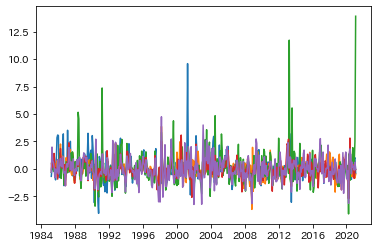

In [11]:
################################
# 　収益率のグラフの描画　　　　　　　　　　
################################

plt.plot(stockM_R.loc[:,'片倉工業':'ユニチカ'])
plt.show()



In [12]:
#プレミアムの計算を行います．

###################################
# 　プレミアムの計算 #
###################################

# ----10年金利はデータが短いので5年金利を（取り敢えず）使用する----
bondM10 = bondM[['5年']]

#（分析するデータの設定)
tempdf = pd.concat([bondM10,stockM_R],axis=1)

#（プレミアムを格納するための空のDataFrameを作成）
stockM_P = pd.DataFrame(index=tempdf.index, columns=[])

#
# ======プレミアムの計算======
#
for column_name, item in tempdf.iteritems():
    stockM_P[column_name] = tempdf[column_name]-tempdf['5年']

#print(stockM_P)

plt.plot(stockM2.loc[:,'片倉工業':'ユニチカ'])
plt.show()

#株価については取り敢えずここまです．プレミアムの計算ができましたので，自由にグラフを描くなり，統計値を計算するなり，CAPMを推計するなりしてください．



In [13]:
#次は財務データの処理です．まず会社名を抽出してみます．

# 会社名を抽出
cNames =[]
for i in zTexData2.index.values:
    cNames.append(i[0])
    #print(list(dict.fromkeys(cNames)))

 
#NEEDSの項目名が長いので，使いやすいように項目名を短くします．

# 項目名の変更
zTexData2 = zTexData2.rename(columns=lambda s: s.replace('<損益計算書（期首からの累計期間）>','PL　'))
zTexData2 = zTexData2.rename(columns=lambda s: s.replace('<貸借対照表（資産）>','BS（資産）'))
zTexData2 = zTexData2.rename(columns=lambda s: s.replace('<貸借対照表（負債）>','BS（負債）'))
zTexData2 = zTexData2.rename(columns=lambda s: s.replace('<貸借対照表（純資産）>','BS（純資産）'))
zTexData2 = zTexData2.rename(columns=lambda s: s.replace('［累計］',''))

 #経営指標の計算を行います．

#　安全性

zTexData2['流動比率'] = zTexData2['BS（資産）流動資産']/zTexData2['BS（負債）流動負債']*100
zTexData2['当座比率'] = \
(zTexData2['BS（資産）現金・預金／現金及び現金同等物']+zTexData2['BS（資産）受取手形・売掛金／売掛金及びその他の短期債権'])\
/zTexData2['BS（負債）流動負債']*100
zTexData2['固定比率'] = zTexData2['BS（資産）固定資産／非流動資産']/zTexData2['BS（純資産）自己資本／親会社の所有者に帰属する資本']*100
zTexData2['固定比率の逆数'] = 1/zTexData2['固定比率']*10000
zTexData2['ICR'] = \
(zTexData2['PL　営業利益']+zTexData2['PL　受取利息・配当金'])\
/zTexData2['PL　支払利息・割引料']
zTexData2['株主資本比率'] = zTexData2['BS（純資産）株主資本']/zTexData2['BS（資産）資産合計']*100
zTexData2['株主資本比率'] = zTexData2['BS（純資産）株主資本']/zTexData2['BS（資産）資産合計']*100

# 成長性

zTexData2['売上高成長率'] = \
(zTexData2['PL　売上高・営業収益']-zTexData2['PL　売上高・営業収益'].shift())/\
zTexData2['PL　売上高・営業収益'].shift()

zTexData2['5年売上高成長率'] = \
(zTexData2['PL　売上高・営業収益']-zTexData2['PL　売上高・営業収益'].shift(5))/\
zTexData2['PL　売上高・営業収益'].shift(5)/5

 


                         株主資本比率        流動比率        固定比率        当座比率  \
企業名称            年                                                     
片倉工業            2010  32.157304  196.060791  137.023244  152.776085   
グンゼ             2010  67.426289  197.536116   87.284688   96.419392   
神栄              2010  15.761106  107.236842  276.641520   55.823068   
川島織物セルコン        2010  12.822038   83.687917  273.339776   54.030952   
東洋紡             2010  18.361277   96.193918  262.486577   50.772833   
ユニチカ            2010   7.456818   76.418109  825.337974   40.072394   
富士紡ホールディングス     2010  23.719506  100.241171  204.099879   74.481769   
クラボウ            2010  47.003199  150.460352  119.182366  102.211609   
ダイワボウホールディングス   2010  19.859375  112.197305  181.517299   84.824398   
シキボウ            2010  17.370882   85.830315  264.164048   56.188490   
オーミケンシ          2010  27.464077   45.000000  359.486118   24.035346   
プロジェ・ホールディングス   2010  85.456274  700.337838    1.724138  141.891892   
サイボー  

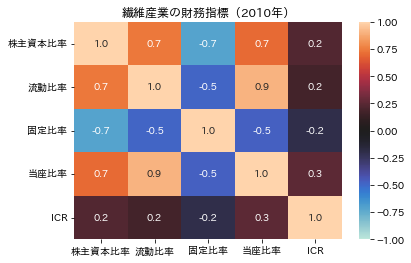

株主資本比率      流動比率      固定比率      当座比率       ICR
株主資本比率  1.000000  0.740725 -0.718442  0.701974  0.220345
流動比率    0.740725  1.000000 -0.488406  0.900476  0.178017
固定比率   -0.718442 -0.488406  1.000000 -0.473202 -0.198660
当座比率    0.701974  0.900476 -0.473202  1.000000  0.253227
ICR     0.220345  0.178017 -0.198660  0.253227  1.000000

In [14]:
#財務指標の抽出を行うには以下のようにします．

#
# 財務データの抽出
#

# 2010年のデータの抽出
zTexData2_2010 = zTexData2.loc[idx[:,2010],:]

sihyou = ['株主資本比率','流動比率','固定比率','当座比率','ICR']

DD_2010 = zTexData2_2010.loc[:,sihyou]

print(DD_2010)

 

corr_mat = DD_2010.corr(method='pearson')

sns.heatmap(corr_mat,vmin=-1.0,vmax=1.0,center=0,annot=True,fmt='.1f',
    xticklabels=corr_mat.columns.values,
    yticklabels=corr_mat.columns.values)
plt.title('繊維産業の財務指標（2010年）')
plt.show()

corr_mat


#財務データについても取り敢えずここまです．経営指標の計算ができましたので，自由にグラフを描くなり，統計値を計算するなりしてください．




In [15]:
##############################################################
#
#　　 　　CAPMの計算　
#
##############################################################

#　会社名のプリント
print(stockM_P.columns.values)

Y=stockM_P['片倉工業'].dropna()
X=stockM_P['日経平均'].to_frame().dropna()
X = sm.add_constant(X)

#　回帰分析
model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

plt.plot(Y)


['5年' '日経平均' 'TOPIX' '東証2部総合' '東証マザーズ' 'JASDAQ' '片倉工業' 'グンゼ' '神栄' '東洋紡'
 'ユニチカ' '富士紡ホールディングス' 'クラボウ' 'ダイワボウホールディングス' 'シキボウ' 'オーミケンシ' 'サイボー' '新内外綿'
 '日本毛織' 'ダイトウボウ' 'トーア紡コーポレーション' 'ダイドーリミテッド' '帝国繊維' '日本製麻' '帝人' '東レ'
 'サカイオーベックス' '北日本紡績' '住江織物' '丸八ホールディングス' '日本フエルト' 'イチカワ' 'フジコー' '日東製網'
 'アツギ' 'ダイニック' '共和レザー' 'セーレン' 'ソトー' '東海染工' '倉庫精練' '小松マテーレ' 'オーベクス'
 'ワコールホールディングス' 'ホギメディカル' '自重堂' '山喜' 'フジックス' '川本産業' 'クラウディアホールディングス'
 'ＴＳＩホールディングス' 'マツオカコーポレーション' 'ワールド']
                            OLS Regression Results                            
Dep. Variable:                   片倉工業   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 24 May 2022   Prob (F-statistic):           6.51e-30
Time:                        17:06:33   Log-Likelihood:                -606.49
No. Observations:                 432   AIC:                      

C:\Users\shintaro\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
#####################################################################　
#   コーポレートガバナンス評価システム（Cges）のデータの読み込み
# （日経NEEDSより）　　　　 　
#####################################################################


Gdata = pd.read_csv('TextileCges.csv', encoding="shift-jis")
Gdata = Gdata.set_index('企業名称')

# 項目名を短くする
Gdata = Gdata.rename(columns=lambda s: re.sub('<評点.*>','評点：',s))
Gdata = Gdata.rename(columns=lambda s: re.sub('<.*>','',s))
#Gdata2

for i in Gdata.columns.values[0:]:
    print(i)

 

# 項目を抽出する
Gdata2 = Gdata[[
    '女性の役員比率','指名委員会等設置フラグ','監査等委員会設置フラグ',
    '独立社外取締役比率',
    '国内機関投資家持株比率','外国人(個人)持株比率']]
# 項目名を更に短くする
Gdata2 = Gdata2.rename(columns={
    '指名委員会等設置フラグ':'指','監査等委員会設置フラグ':'監',
    '独立社外取締役比率':'社外',
    '国内機関投資家持株比率':'機投','外国人(個人)持株比率':'外'})
print(Gdata2)



日経会社コード
更新月
株式コード
連結基準
上場情報:東京
上場情報:名古屋
上場情報:福岡
上場情報:札幌
日経業種中分類コード
東証33業種分類コード
ROA
ROA 3年平均(会計報告ベース)
ROA(業種等調整)
ROA3年平均(会計報告ベース､業種等調整)
ROE
ROE 3年平均(会計報告ベース)
ROE(業種等調整)
ROE3年平均(会計報告ベース､業種等調整)
営業CF総資産比率
営業CF総資産比率(業種等調整)
フリーCF総資産比率
フリーCF総資産比率(業種等調整)
過去3年累積特別損失
3期連続営業赤字
2期連続最終赤字
3期連続最終赤字
5期通算最終損益
債務返済に問題(GC注記)
資金調達が困難(GC注記)
売上の著しい減少(GC注記)
継続的な損失(GC注記)
債務超過(GC注記)
重要な損失(GC注記)
継続企業の前提に関する注記の有無
トービンのQ
トービンのQ3年平均
トービンのQ(業種等調整)
トービンのQ3年平均(業種等調整)
株式リターン1年平均(事業年度ベース)
株式リターン3年平均(事業年度ベース)
PBR(直近実績決算期末)
PBR3年平均(直近実績決算期末)
PBR(直近実績決算期末､業種等調整)
PBR3年平均(直近実績決算期末､業種等調整)
株式リターン1年平均(直近月末ベース)
株式リターン3年平均(直近月末ベース)
株式リターン1年平均(直近月末ベース､業種等調整)
株式リターン3年平均(直近月末ベース､業種等調整)
PBR(直近月末ベース)
株価変動3年(事業年度ベース)
株価変動3年(直近月末ベース)
株価変動3年(直近月末ベース､業種等調整)
代表者就任後の株式リターン1
代表者就任後の株式リターン2
代表者就任後の株式リターン1(業種等調整)
代表者就任後の株式リターン2(業種等調整)
自己資本比率
売上高流動性比率1
売上高流動性比率2
売上高流動性比率3
売上高流動性比率1(業種等調整)
売上高流動性比率2(業種等調整)
売上高流動性比率3(業種等調整)
株主還元比率1
株主還元比率2
株主還元比率3
配当性向･実績(単独)
配当性向･予想(単独)
配当性向･実績(連結)
赤字配当(単独)
3期連続無配(単独)
一株配当金増加･予想
一株配当金増加･実績
自社株買い実現率･合計(株数)
自社株買い

In [17]:

corr_mat = Gdata2.corr(method='pearson')
sns.heatmap(corr_mat,vmin=-1.0,vmax=1.0,center=0,annot=True,fmt='.1f',
    xticklabels=corr_mat.columns.values,
    yticklabels=corr_mat.columns.values)
plt.title('コーポレートガバナンス（繊維産業）')
plt.show()
corr_mat



女性の役員比率   指         監        社外        機投         外
女性の役員比率  1.000000 NaN  0.015460  0.392271  0.280235 -0.087645
指             NaN NaN       NaN       NaN       NaN       NaN
監        0.015460 NaN  1.000000  0.179371 -0.217121 -0.003206
社外       0.392271 NaN  0.179371  1.000000  0.406094 -0.048803
機投       0.280235 NaN -0.217121  0.406094  1.000000  0.021970
外       -0.087645 NaN -0.003206 -0.048803  0.021970  1.000000